# Simulando carteira de ações e comparando com IBOV

## 1 - Importando as ferramentas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

## 2 - Coletando os dados

In [2]:
tickers = ['^BVSP', 'ABEV3.SA', 'ITSA4.SA', 'WEGE3.SA', 'USIM5.SA', 'VALE3.SA']
amount_to_invest = 10000

In [3]:
wallet = yf.download(tickers= tickers[1:])
ibov = yf.download(tickers=tickers[0])

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# ibov = wallet.xs(tickers[0],level='Ticker', axis=1)

# for col in wallet.columns:
#     if col[1] =='^BVSP':
#         wallet = wallet.drop(columns=col)

## 3 - Visualizando os dados

<Axes: xlabel='Date'>

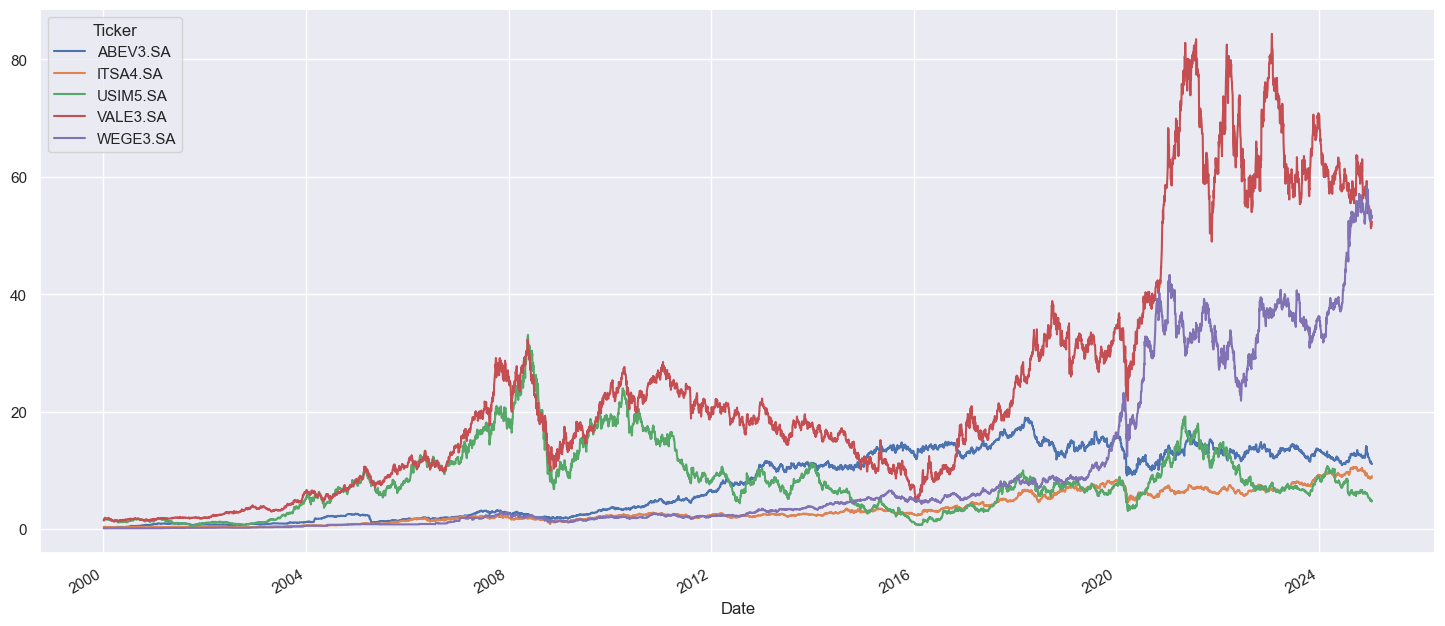

In [5]:
sns.set()
wallet['Close'].plot(figsize=(18,8))

<Axes: xlabel='Date'>

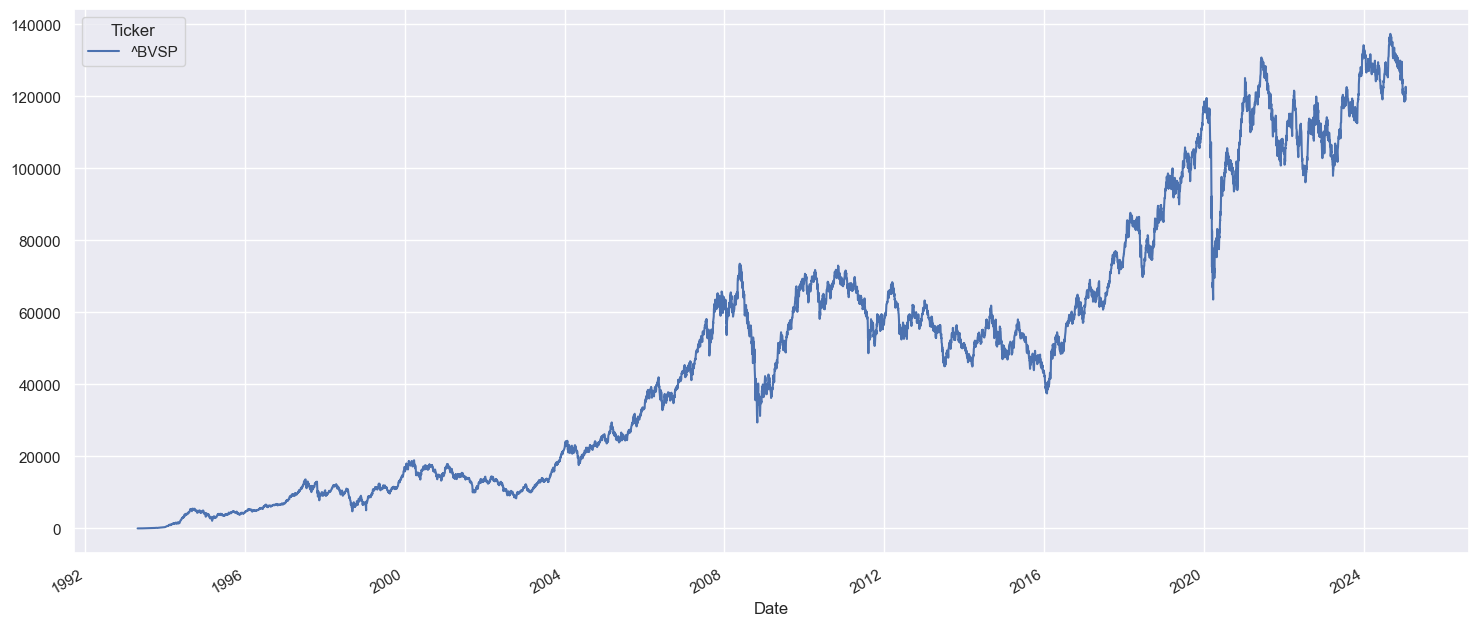

In [6]:
ibov['Close'].plot(figsize=(18,8))

## 4 - Tratando os dados

In [7]:
wallet= wallet.dropna()
ibov=ibov.dropna()

## 5 - Analisando os dados

In [ ]:
normalized_wallet = (wallet['Close'] / wallet['Close'].iloc[0]) * (amount_to_invest/len(tickers))
normalized_ibov = (ibov['Close']/ibov['Close'].iloc[0]) * amount_to_invest

normalized_wallet['Balance'] = normalized_wallet.sum(axis=1)

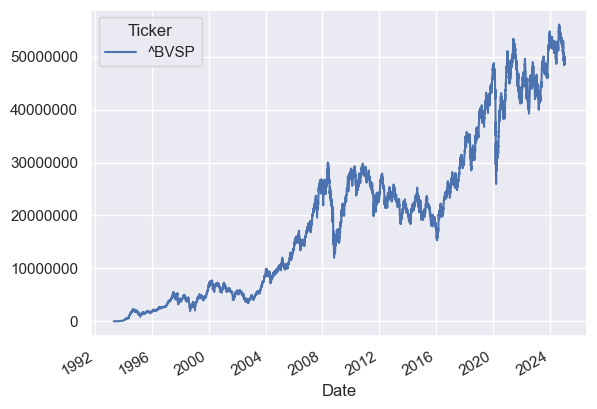

In [11]:
normalized_ibov.plot()
plt.gca().yaxis.get_major_formatter().set_scientific(False)

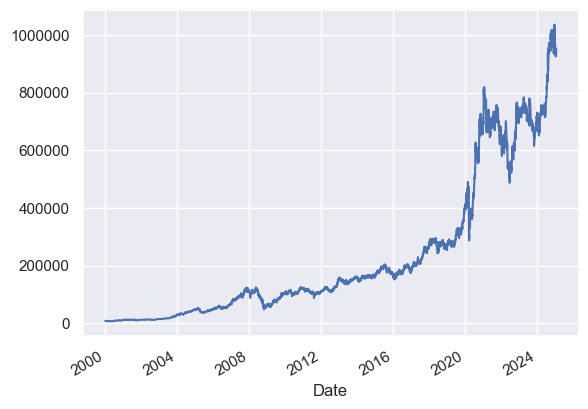

In [27]:
normalized_wallet['Balance'].plot()
plt.gca().yaxis.get_major_formatter().set_scientific(False)

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))


normalized_wallet['Balance'].plot(ax=ax)
normalized_ibov.plot(ax=ax)

plt.legend(['Balance', 'Ibov'])

plt.gca().yaxis.get_major_formatter().set_scientific(False)
